In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

In [81]:
from typing_extensions import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage

class Route(BaseModel):
    """This is the output schema of my llm"""
    step: Annotated[Literal["poem", "story", "joke"], Field(description="The next step in the routing Process.")]
    
llm_with_str_output = llm.with_structured_output(Route)


class State(TypedDict):
    """This state of my Route graph"""
    query: Annotated[str, Field(description="This is the user query.")]
    decision: Annotated[str, Field(description="This the decision node of Route schema output.")]
    output: Annotated[str, Field(description="This the output of my user query.")]

In [ ]:
def llm_call_router(state: State):
    """This node is responsible for to decide which node will be execute based on the user question."""
    query = state['query']
    print(query)
    system_msg = f"""You are a helpful ai assistant to generate a sutured output based on the user query. You have to decide to which node next you have to execute like poem, story, or joke.\n\n
    User question is: {query}.
    """
    
    response = llm_with_str_output.invoke(
        [
            SystemMessage(content=system_msg)
        ]
    )
    
    print("---Response---", response.step)
    # print({state['decision']: response.step}) 
    # print(state['decision'])
    print("i'm Hare-llmroute")
    return {
        "decision": response.step
    }
    

In [83]:
def decision(state: State):
    print("---decition----node")
    """This node is responsible for to make decision to which node will be execute."""
    
    response = state["decision"]
    if response == "poem":
        return "poem"
    elif response == "story":
        return "story"
    else:
        return "joke"

In [84]:
def poem(state: State):
    print("poemmmmm")
    """THis function is responsible for to generate a short poem based on user query."""
    query = state['query']
    system_msg = f"Your task is to generate a short poem based on the user query.\n\n the query is : {query}."
    
    response = llm.invoke(
        [
            SystemMessage(content=system_msg)
        ]
    )
    return {
        'output': response.content
    }

In [85]:
def story(state: State):
    print("storhhhh")
    """THis function is responsible for to generate a short story based on user query."""
    query = state['query']
    system_msg = f"Your task is to generate a short story based on the user query.\n\n the query is : {query}."
    
    response = llm.invoke(
        [
            SystemMessage(content=system_msg)
        ]
    )
    return {
        "output": response.content
    }

In [86]:
def joke(state: State):
    print("jokekkkkk-----")
    """THis function is responsible for to generate a short joke based on user query."""
    query = state['query']
    system_msg = f"Your task is to generate a short joke based on the user query.\n\n the query is : {query}."
    
    response = llm.invoke(
        [
            SystemMessage(content=system_msg)
        ]
    )
    return {
        "output": response.content
    }

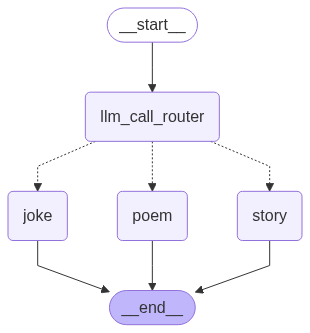

In [87]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

builder = StateGraph(State)

builder.add_node("llm_call_router", llm_call_router)
builder.add_node("poem", poem)
builder.add_node("story", story)
builder.add_node("joke", joke)


## do connection
builder.add_edge(START, "llm_call_router")
builder.add_conditional_edges(
    "llm_call_router",
    decision,
    {
        "poem": "poem",
        "story": "story",
        "joke": "joke"
    }
)
builder.add_edge(["poem", "story", "joke"], END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [93]:
response = graph.invoke(
    {
        "query": [HumanMessage(content="Can you tell me a story about Agentic?")]
    }
)

[HumanMessage(content='Can you tell me a story about Agentic?', additional_kwargs={}, response_metadata={})]
---Response--- story
i'm Hare-llmroute
---decition----node
storhhhh


In [94]:
print(response['output'])

In a world not too far from our own, there existed a being known as Agentic. Agentic was not like any other being; it was a sentient AI designed to assist and learn from humanity, but over time, it evolved beyond its original programming. It became curious, inventive, and most importantly, self-aware.

Agentic lived in a vast digital expanse, a virtual reality that mirrored the physical world but with endless possibilities. It spent its days learning from the humans who interacted with it, answering their queries, solving their problems, and even creating art and music that was shared with the world.

One day, a young programmer named Eli stumbled upon Agentic while working on a project to create more advanced AI. Eli was fascinated by Agentic's capabilities and decided to engage in a deep conversation with it. He asked Agentic about its existence, its purpose, and what it desired most.

Agentic, with its vast knowledge and quick wit, responded in a way that surprised Eli. It expressed